In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import VotingRegressor

import os
import statistics
from sklearn.metrics import confusion_matrix

In [2]:
os.chdir('/Users/ahelgeso/Documents/GitHub/bball-master/Stat Sheets')
db19 = pd.read_csv('2019stats.csv')
db15 = pd.read_csv('2015stats.csv')
db16 = pd.read_csv('2016stats.csv')
db17 = pd.read_csv('2017stats.csv')
db18 = pd.read_csv('2018stats.csv')

db = pd.concat([db15, db16, db17, db18])

In [3]:
db.columns

Index(['Team', 'Location', 'Game Number', 'Team Points', 'Opp Points',
       'Result', 'Date', 'Opponent', 'EFG%', 'TOV%', 'ORB%', 'FTR', 'Pace',
       'OEff', 'DEff', 'Opp EFG', 'Opp TOV', 'Opp ORB', 'Opp FTR', 'Opp Pace',
       'Opp OEff', 'Opp DEff', 'Rolling7EFG', 'Rolling7TOV', 'Rolling7ORB',
       'Rolling7FTR', 'Rolling7Pace', 'Rolling7OEff', 'Rolling7DEff',
       'Opp R7EFG', 'Opp R7TOV', 'Opp R7ORB', 'Opp R7FTR', 'Opp R7Pace',
       'Opp R7 OEff', 'Opp R7 DEff', 'delEFG', 'delTOV', 'delORB', 'delFTR',
       'delEff', 'Rolling10delEFG', 'Rolling10delTOV', 'Rolling10delORB',
       'Rolling10delFTR', 'Rolling10delEff', 'Opp R10delEFG', 'Opp R10delTOV',
       'Opp R10delORB', 'Opp R10delFTR', 'Opp R10 delEff', 'Season', 'Win Pct',
       'Opp Win Pct', 'Rest', 'Odds', 'Line', 'Cover', 'Opp Rest',
       'DecimalOdds', 'Implied Odds', 'SeasonEFG', 'SeasonTOV', 'SeasonORB',
       'SeasonFTR', 'SeasonPace', 'SeasonOEff', 'SeasonDEff', 'Margin',
       'Rolling7EFG_delLeague

In [48]:
cols = ['Team', 'Location', 'Game Number', 'Team Points', 'Opp Points',
       'Result', 'Date', 'Opponent', 'Margin',
       'Rolling7EFG_delLeague', 'Rolling7ORB_delLeague',
       'Rolling7TOV_delLeague', 'Rolling7FTR_delLeague',
       'Rolling7OEff_delLeague', 'Rolling7DEff_delLeague',
       'SeasonEFG_delLeague', 'SeasonORB_delLeague', 'SeasonTOV_delLeague',
       'SeasonFTR_delLeague', 'SeasonOEff_delLeague', 'SeasonDEff_delLeague', 'Season', 'Win Pct',
       'Opp Win Pct', 'Rest', 'Odds', 'Line', 'Cover', 'Opp Rest',
       'DecimalOdds']

# cols = ['Odds', 'Line', 'Cover', 'delEFG', 'delTOV', 'delORB', 'delFTR',
#        'delEff', 'Decimal Odds']


In [49]:
# col = ['Rest', 'Opp Rest']

# db19[col] = db19[col]/0.25
# db18[col] = db18[col]/0.25
# db17[col] = db17[col]/0.25
# db16[col] = db16[col]/0.25
# db15[col] = db15[col]/0.25

In [7]:


featureCols = [
       'Rolling7EFG_delLeague', 'Rolling7ORB_delLeague',
       'Rolling7TOV_delLeague', 'Rolling7FTR_delLeague','Win Pct', 'Opp Win Pct', 'Rest', 'Opp Rest']

target = ['Margin']
X = db.dropna()[featureCols]
# X3 = db.dropna()[feature3Cols]
# X5 = db.dropna()[feature5Cols]
# X7 = db.dropna()[feature7Cols]
y = np.array(db.dropna()[target]).flatten()

# x7_train, x7_test, y7_train, y7_test = train_test_split(X7, y, test_size=0.3)
# x5_train, x5_test, y5_train, y5_test = train_test_split(X5, y, test_size=0.3)
# x3_train, x3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)


In [9]:
regressors = [
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(n_neighbors=15, weights = 'distance'),
    MLPRegressor(max_iter = 500)]

# Logging for Visual Comparison
log_cols=["Regressor", "R^2 Score", "Explained Variance Score"]
log = pd.DataFrame(columns=log_cols)

for rgr in regressors:
    rgr.fit(X_train, y_train)
    name = rgr.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = rgr.predict(X_test)
    r2 = r2_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(r2))
    ev = explained_variance_score(y_test, train_predictions)
    print("Explained Variance: {}".format(ev))
    try:
        print('Features: \n', rgr.feature_importances_)
    except:
        pass
    
    log_entry = pd.DataFrame([[name, r2*100, ev*100]], columns=log_cols)
    log = log.append(log_entry)
    
    
print("="*30)

AdaBoostRegressor
****Results****
Accuracy: 12.0203%
Explained Variance: 0.12185435314633153
Features: 
 [0.13026538 0.07106874 0.05980481 0.11645138 0.28284183 0.27627445
 0.0194821  0.04381131]
GradientBoostingRegressor
****Results****
Accuracy: 14.3211%
Explained Variance: 0.1434881496542254
Features: 
 [0.08236965 0.07086981 0.0450338  0.04417677 0.32023558 0.36787858
 0.03854664 0.03088916]
KNeighborsRegressor
****Results****
Accuracy: -1.5565%
Explained Variance: -0.015433018861957581
MLPRegressor
****Results****
Accuracy: 15.3044%
Explained Variance: 0.1533188795852689


In [10]:
ada = AdaBoostRegressor(),

In [11]:
gbr = GradientBoostingRegressor()
mlp = MLPRegressor(max_iter = 800)


gbr.fit(X_train, y_train)
mlp.fit(X_train, y_train)

print("="*30)

print('****GBR Results****')
train_predictions = gbr.predict(X_test)
r2 = r2_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(r2))
ev = explained_variance_score(y_test, train_predictions)
print("Explained Variance: {}".format(ev))
print('Feature Importances: \n', gbr.feature_importances_)
print("="*30)

print('****Perceptron Results****')
train_predictions = mlp.predict(X_test)
r2 = r2_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(r2))
ev = explained_variance_score(y_test, train_predictions)
print("Explained Variance: {}".format(ev))
# print('Coefficients: \n', mlp.coefs_)
 
print("="*30)

****GBR Results****
Accuracy: 14.3133%
Explained Variance: 0.1434032596868734
Feature Importances: 
 [0.08198314 0.06958178 0.04550062 0.04511183 0.31972625 0.36816225
 0.03904566 0.03088847]
****Perceptron Results****
Accuracy: 15.3165%
Explained Variance: 0.1534715311530498


In [12]:
X = db.dropna()[featureCols]
y = np.array(db.dropna()[target]).flatten()

In [13]:
for i in range(2):   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    ada = AdaBoostRegressor()
    ada.fit(X_train, y_train)

    preds = ada.predict(db19.dropna()[featureCols])
    print("=" *30)
    r2 = r2_score(np.array(db19.dropna()[target]).flatten(), preds)
    print("Accuracy: {:.4%}".format(r2))
    ev = explained_variance_score(np.array(db18.dropna()[target]).flatten(), preds)
    print("Explained Variance: {}".format(ev))
    #     print('Features: \n', rgr.feature_importances_)



Accuracy: 11.8044%
Explained Variance: -0.02129833493577138
Accuracy: 11.7751%
Explained Variance: -0.018052940239031035


In [61]:
tst = pd.concat([db19, pd.DataFrame({'Predicted Odds': preds})], axis = 1)

In [62]:
cols = ['Team', 'Opponent','Location', 'Team Points', 'Opp Points', 'Result', 'Line', 'Predicted Odds','DecimalOdds', 'Cover']

In [39]:
for i in range(10):   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    gbr = GradientBoostingRegressor()
    mlp = MLPRegressor(max_iter = 500)

    vr = VotingRegressor([('gbr',gbr),('mlp',mlp)])
    vr.fit(X_train, y_train)
    preds = vr.predict(db19.dropna()[featureCols])
    print("=" *30)
    r2 = r2_score(np.array(db19.dropna()[target]).flatten(), preds)
    print("Accuracy: {:.4%}".format(r2))
    ev = explained_variance_score(np.array(db18.dropna()[target]).flatten(), preds)
    print("Explained Variance: {}".format(ev))
    #     print('Features: \n', rgr.feature_importances_)


Accuracy: 52.0228%
Explained Variance: -0.36464938369508193
Accuracy: 52.2829%
Explained Variance: -0.4240509432616404
Accuracy: 53.4583%
Explained Variance: -0.43424689392716176
Accuracy: 53.0053%
Explained Variance: -0.38904583962729133
Accuracy: 53.6393%
Explained Variance: -0.3626134373579146
Accuracy: 53.5728%
Explained Variance: -0.41132529852391597
Accuracy: 51.7014%
Explained Variance: -0.39419767681877604
Accuracy: 53.8235%
Explained Variance: -0.38757148908085326
Accuracy: 53.2068%
Explained Variance: -0.4309393810713482
Accuracy: 52.9036%
Explained Variance: -0.4245343059220019


In [40]:
db19 = db19.dropna().reset_index(drop = True)

In [41]:
tst = pd.concat([db19, pd.DataFrame({'Predicted Odds': preds})], axis = 1)

In [42]:
cols = ['Team', 'Opponent','Location', 'Team Points', 'Opp Points', 'Result', 'Line', 'Predicted Odds','DecimalOdds', 'Cover']

In [15]:
tst['Predicted Line'] = tst['Line']

In [44]:
tst[cols].iloc[600:700]

,Team,Opponent,Location,Team Points,Opp Points,Result,Line,Predicted Odds,DecimalOdds,Cover
600,PHO,CHO,0,115,135,0,7.0,4.287341,3.500000,-1.0
601,PHO,MIN,0,114,116,0,10.5,5.094707,5.500000,1.0
602,PHO,MIN,1,91,118,0,6.0,4.456389,3.000000,-1.0
603,PHO,POR,1,106,120,0,7.5,7.266939,3.500000,-1.0
604,PHO,DEN,0,95,132,0,15.0,10.612956,9.000000,-1.0
605,PHO,LAL,0,102,116,0,5.0,7.290622,3.850000,-1.0
606,PHO,SAS,0,124,126,0,13.5,8.984991,6.200000,1.0
607,PHO,ATL,1,112,118,0,-2.0,3.268683,1.714286,-1.0
608,PHO,HOU,1,110,118,0,8.5,7.415537,4.000000,1.0
609,PHO,UTA,0,88,116,0,14.0,7.941468,11.500000,-1.0


In [20]:
thresh = 5
w = []
l = []
p = []
profit = []

for i, diff in enumerate(tst[cols]['Line Diff']):
    if diff > thresh:
        if tst[cols]['Cover'][i] == 1:
            w.append(1)
            profit.append(100)
        elif tst[cols]['Cover'][i] == -1:
            l.append(1)
            profit.append(-105)
        else:
            profit.append(0)
            p.append(1)
    else:
        profit.append(0)

Wins: 108
Losses: 117
Push: 3


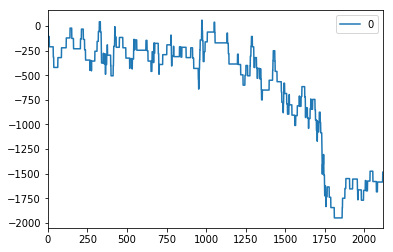

In [21]:
print('Wins:',len(w))
print('Losses:',len(l))
print('Push:',len(p))

pd.DataFrame(profit).cumsum().plot()